In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=pd.read_csv("DataSets/train_data.csv")
test=pd.read_csv("DataSets/test_data.csv")
sub=pd.read_csv("DataSets/SampleSubmission.csv")

In [ ]:
#Drop join_date column in Test and Train Dataset before it contains null values
train=train.drop('join_date',axis=1)
test=test.drop('join_date',axis=1)

#make Unnamed: 0 as your index in Train and Test Data
train=train.set_index('Unnamed: 0')
test=test.set_index('Unnamed: 0')

In [ ]:
train.head()

,ID,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,ID X PCODE,Label
Unnamed: 0,,,,,,,,,,
0,4WKQSBB,F,M,1987,1X1H,2A7I,T4MS,P5DA,4WKQSBB X P5DA,0
1,CP5S02H,F,M,1981,UAOD,2A7I,T4MS,P5DA,CP5S02H X P5DA,0
2,2YKDILJ,M,U,1991,748L,QZYX,90QI,P5DA,2YKDILJ X P5DA,0
3,2S9E81J,M,M,1990,1X1H,BP09,56SI,P5DA,2S9E81J X P5DA,0
4,BHDYVFT,M,M,1990,748L,NO3L,T4MS,P5DA,BHDYVFT X P5DA,0


##Explaratory Data Analysis

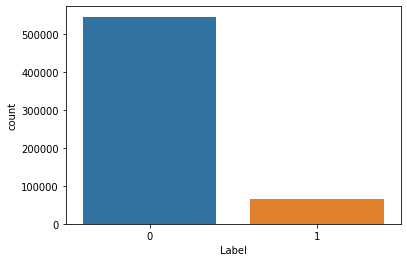

In [ ]:
#
sns.countplot(train['Label'])

In [ ]:
#check distribution of target variables
train['Label'].value_counts(normalize=True)

0    0.89154
1    0.10846
Name: Label, dtype: float64

In [ ]:
#check distribution of occupation_code
train['occupation_code'].value_counts(normalize=True)

2A7I    0.243341
0KID    0.136242
SST3    0.093059
UJ5T    0.071365
0OJM    0.053721
          ...   
A4ZC    0.000034
CYDC    0.000034
OEH6    0.000034
CEL6    0.000034
4M0E    0.000034
Name: occupation_code, Length: 233, dtype: float64

In [ ]:
#check distribution of occupation_category_code
train['occupation_category_code'].value_counts(normalize=True)

T4MS    0.639125
90QI    0.190581
56SI    0.125463
L44T    0.021557
JD7X    0.019772
AHH5    0.003501
Name: occupation_category_code, dtype: float64

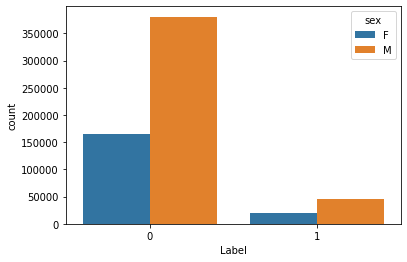

In [ ]:
#check distribution of Target Variables against Gender
sns.countplot(train['Label'],hue='sex',data=train)

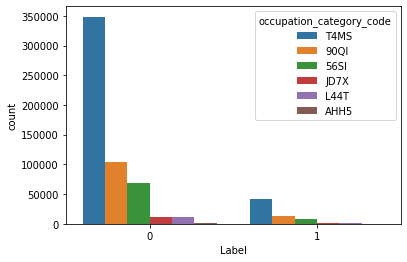

In [ ]:
#check distribution of Target Variables against occupation_category_code
sns.countplot(train['Label'],hue='occupation_category_code',data=train)

#Convert Independent Variable to Numerical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#Convert PCODE to numeric values in train dataset
train['PCODE']=le.fit_transform(train['PCODE'])

#Convert PCODE to numeric values in test dataset
test['PCODE']=le.transform(test['PCODE'])

In [ ]:
#Filter out PCODE as X train dataset
X=train[['PCODE']]

#Filter out Label as y from train dataset
y=train['Label']

#Filter out Label as y from test dataset
test_data=test[['PCODE']]

#Handling Imbalanced Dataset

In [ ]:
#CHeck shape of Train Data first
print(X.shape, y.shape)

(611772, 1) (611772,)


In [ ]:

#Import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

#Instantiate RandomUnderSampler which will reduce the majority class 
under = RandomUnderSampler()#resample data into 0.9 ratio

#fit X and y Values to RandomUnderSampler
X_res, y_res = under.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Check size of Data after balancing the dataset
print(X_res.shape, y_res.shape,test_data.shape)

(132706, 1) (132706,) (210000, 1)


In [ ]:
#Split Data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,Perceptron
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Insantiate Classifier
dtc=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


xgb=DecisionTreeClassifier()
rfc=RandomForestClassifier()

#Train Model
dtc.fit(X_train,y_train)
xgb.fit(X_train,y_train)
rfc.fit(X_train,y_train)

#Make DecisionTreeClassifier predition 
y_pred_dtc=dtc.predict(X_test)
y_pred_dtc_proba=dtc.predict_proba(X_test)


#Make XGBClassifier predition
y_pred_xgb=xgb.predict(X_test)
y_pred_xgb_proba=xgb.predict_proba(X_test)

#Make RandomForestClassifier predition
y_pred_rfc=rfc.predict(X_test)
y_pred_rfc_proba=rfc.predict_proba(X_test)


#Model Evaluation

In [ ]:
from sklearn.metrics import classification_report,log_loss

In [ ]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     16629
           1       0.88      0.84      0.86     16548

    accuracy                           0.86     33177
   macro avg       0.86      0.86      0.86     33177
weighted avg       0.86      0.86      0.86     33177



In [ ]:
print(log_loss(y_test,y_pred_dtc_proba))

0.37294792813755545


In [ ]:
#Predict values our values Test_Data
dtc.predict_proba(test_data)[:,1] #use [:,1] to output values for only one column(The 1 class)

array([0.01000371, 0.01000371, 0.01000371, ..., 0.25134811, 0.25134811,
       0.25134811])

In [ ]:
#Create a DataFrame for the predict values in Test_Data
predicted_values=pd.DataFrame(dtc.predict_proba(test_data)[:,1])

In [ ]:
#combine test dataset with predicted_values
answer=pd.concat([test,predicted_values],axis=1)

In [ ]:
#Drop Label column 
answer=answer.drop('Label',axis=1)

In [ ]:
#Rename 0 column to Label
answer=answer.rename(columns={0:"Label"})

In [ ]:
#Filter out only ID X PCODE and Label
answer=answer[['ID X PCODE','Label']]

In [ ]:
#set index to ID X PCODE
answer=answer.set_index("ID X PCODE")

In [ ]:
#convert to CSV file for submission
answer.to_csv("insurance.csv")

In [ ]:
answer.head()

,Label
ID X PCODE,
F86J5PC X P5DA,0.001526
H6141K3 X P5DA,0.001526
RBAYUXZ X P5DA,0.001526
KCBILBQ X P5DA,0.001526
LSEC1ZJ X P5DA,0.001526
